In [ ]:
# Wine Quality Dataset
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
# print("Path to dataset files:", path)

# Užduotis - naudodamiesi savo žinomais ML įrankiais
# įvertinkite vynų kokybę (quality)
# pateikite confusion matrix vizualizacijas, accuracy score

# MOvie DB https://grouplens.org/datasets/movielens/
# https://files.grouplens.org/datasets/movielens/ml-32m-README.html

# Projektas (kažkiek dienų trukmės)
# (Čia ne ML, kurkite savo algoritmą, arba savo algoritmą + ML):
# Filmų rekomendacijos skriptas (Jupyter notebook)  arba Streamlit aplikacija
# Rekomenduoti filmus pagal pasirinkimus (remiantis kitų vartotojų vertinimais) - vartotojas įveda žanrą, aktorių, etc .. 
# (apribokite įvestį 3-5 parametrais)
# Rezultatas - rekomenduojami filmai ( 1, 2 ar daugiau)
# get_dummies() -> dummy_df = df["Fruits"].str.get_dummies(", ") 
# iš čia: https://stackoverflow.com/questions/76783764/pandas-get-dummies-on-rows-with-multiple-entries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

import kagglehub

In [ ]:
# Wine Quality Dataset
# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
# print("Path to dataset files:", path)

# Užduotis - naudodamiesi savo žinomais ML įrankiais
# įvertinkite vynų kokybę (quality)
# pateikite confusion matrix vizualizacijas, accuracy score

In [2]:
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")
print("Path to dataset files:", path)

100%|██████████| 21.5k/21.5k [00:00<00:00, 1.32MB/s]

Extracting files...
Path to dataset files: C:\Users\tevyn\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1


In [3]:
df = pd.read_csv(path+"/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# Get unique values from the 'Name' column
uni_quality = df['quality'].unique()
print(uni_quality)

[5 6 7 4 8 3]


In [5]:
# Define features (X) and target (y)
X = df.drop(columns=['quality'])  # Features
y = df['quality']  # 

Logistic Regression model accuracy (in %): 46.288209606986904


<Axes: >

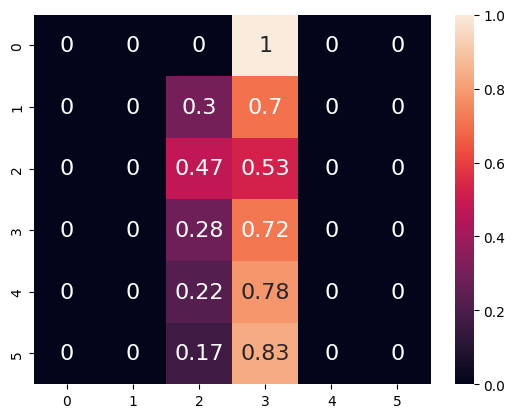

In [6]:
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.20,
                                   random_state=23)

# LogisticalRegression
clf = LogisticRegression(random_state=0)
# train the model
clf.fit(X_train, y_train)

# prediction
y_pred = clf.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

# class_report = classification_report(y_test, y_pred)
# print('Classification Report:')
# print(class_report)

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm, annot=True, annot_kws={'fontsize':16})

Desicion tree accuracy score: 56.33187772925764 %


<Axes: >

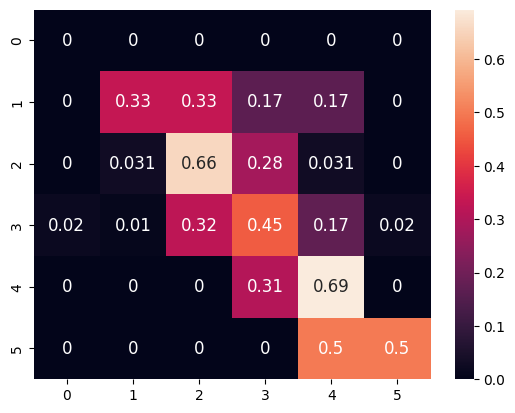

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Desicion tree accuracy score: {accuracy *100} %')

cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':12})

In [ ]:
# MOvie DB https://grouplens.org/datasets/movielens/
# https://files.grouplens.org/datasets/movielens/ml-32m-README.html

# Projektas (kažkiek dienų trukmės)
# (Čia ne ML, kurkite savo algoritmą, arba savo algoritmą + ML):
# Filmų rekomendacijos skriptas (Jupyter notebook)  arba Streamlit aplikacija
# Rekomenduoti filmus pagal pasirinkimus (remiantis kitų vartotojų vertinimais) - vartotojas įveda žanrą, aktorių, etc .. 
# (apribokite įvestį 3-5 parametrais)
# Rezultatas - rekomenduojami filmai ( 1, 2 ar daugiau)
# get_dummies() -> dummy_df = df["Fruits"].str.get_dummies(", ") 
# iš čia: https://stackoverflow.com/questions/76783764/pandas-get-dummies-on-rows-with-multiple-entries

In [ ]:
#  pvz
import pandas as pd

# Sample dataset (you can replace this with a larger MovieLens dataset)
# data = {
#     'Title': ['The Matrix', 'Inception', 'The Dark Knight', 'Interstellar', 'The Godfather', 'Pulp Fiction'],
#     'Genre': ['Action|Sci-Fi', 'Action|Sci-Fi', 'Action|Crime', 'Adventure|Sci-Fi', 'Crime|Drama', 'Crime|Drama'],
#     'Rating': [8.7, 8.8, 9.0, 8.6, 9.2, 8.9],
#     'Release Year': [1999, 2010, 2008, 2014, 1972, 1994]
# }

# # Convert data into DataFrame
# df = pd.DataFrame(data)

# def recommend_movie():
#     print("Please provide the following parameters to get movie recommendations:")
    
#     # Collecting user input
#     genre_input = input("Enter genre (e.g., Action|Sci-Fi): ").strip()
#     rating_input = input("Enter minimum rating (e.g., 8.0): ").strip()
#     year_input = input("Enter a preferred release year (e.g., 2000): ").strip()
    
#     # Convert rating_input and year_input to proper types
#     rating_input = float(rating_input) if rating_input else None
#     year_input = int(year_input) if year_input else None
    
#     # Filter the DataFrame based on user inputs
#     filtered_movies = df

#     if genre_input:
#         filtered_movies = filtered_movies[filtered_movies['Genre'].str.contains(genre_input, case=False)]
    
#     if rating_input:
#         filtered_movies = filtered_movies[filtered_movies['Rating'] >= rating_input]
    
#     if year_input:
#         filtered_movies = filtered_movies[filtered_movies['Release Year'] == year_input]
    
#     # Recommend movies
#     if not filtered_movies.empty:
#         print("\nRecommended Movies based on your criteria:")
#         print(filtered_movies[['Title', 'Genre', 'Rating', 'Release Year']])
#     else:
#         print("Sorry, no movies match your criteria.")

# # Run the recommendation function
# recommend_movie()


In [8]:
from datetime import datetime

In [39]:
ratings = pd.read_csv('../../../eismas/ml-32m/ratings.csv')
ratings.head(2)


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228


In [11]:
def convert_timestamp_to_datetime(x):
    dt_object = datetime.fromtimestamp(x)
    return dt_object

In [12]:

ratings['datetime'] = ratings['timestamp'].apply(convert_timestamp_to_datetime)
ratings.head(2)

,userId,movieId,rating,timestamp,datetime
0,1,17,4.0,944249077,1999-12-03 21:24:37
1,1,25,1.0,944250228,1999-12-03 21:43:48


In [40]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [27]:
# ratings_gr = ratings.groupby('movieId').agg(
#     rating_list=('rating', list),         # Collect ratings into a list
#     timestamp_list=('timestamp', list),   # Collect timestamps into a list
#     datetime_list=('datetime', list)      # Collect datetimes into a list
# ).reset_index()

# ratings_gr.head(2)

: 

: 

In [41]:
# vidurkinam ratinga
ratings_gr1 = ratings.groupby('movieId').agg(
    rating_mean=('rating', 'mean'),
    rating_count=('rating', 'count')
    # timestamp=('timestamp', 'min'),
    # datetime=('datetime', 'min')
).reset_index()

ratings_gr1['rating_mean'] = ratings_gr1['rating_mean'].round(2)


ratings_gr1.head(2)

,movieId,rating_mean,rating_count
0,1,3.90,68997
1,2,3.28,28904


In [ ]:
# movie_ratings_df = ratings.groupby('movieId')['rating'].apply(list).reset_index()

# # Rename columns for clarity
# # movie_t_df.columns = ['movieId', 'tags']

# # Show the resulting DataFrame
# movie_ratings_df.head(2)

In [ ]:
# max_rating = ratings['timestamp'].min()
# print(max_rating)
# print("Maximum rating:", max_rating)
timestamp = 52 # Replace with your timestamp
dt_object = datetime.fromtimestamp(timestamp)
print("Converted Datetime:", dt_object)



In [42]:
movies = pd.read_csv('../../../eismas/ml-32m/movies.csv')
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [21]:
def get_movie_year(x):
    if '(' in x:
        year = x.rsplit('(', 1)[1].strip(')') #rstplit - splitina per pirmą norimą simbolį nuo dešinės
        return year
    else:
        return 'Nenurodyta'

# print(get_movie_year('City of Lost Children, The (Cité des enfants perdus, La) (1995)'))   
movies['movie_year'] = movies['title'].apply(get_movie_year)
movies.head(2)


,movieId,title,genres,movie_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995


In [22]:
uni_year = movies['movie_year'].unique()
print(uni_year)

['1995' '1994' '1996' '1976' '1992' '1988' '1967' '1993' '1964' '1977'
 '1965' '1982' '1990' '1991' '1989' '1937' '1940' '1969' '1981' '1973'
 '1970' '1960' '1955' '1959' '1968' '1980' '1975' '1986' '1948' '1943'
 '1950' '1946' '1987' '1997' '1974' '1956' '1958' '1949' '1972' '1998'
 '1933' '1952' '1951' '1957' '1961' '1954' '1934' '1944' '1963' '1942'
 '1941' '1953' '1939' '1947' '1945' '1938' '1935' '1936' '1926' '1932'
 '1985' '1979' '1971' '1978' '1966' '1962' '1983' '1984' '1931' '1922'
 '1999' '1927' '1929' '1930' '1928' '1925' '1914' '2000' '1919' '1923'
 '1920' '1918' '1921' '2001' '1924' '2002' '2003' '1915' '2004' '1916'
 '1917' '1948) ' '1965) ' '1988) ' '1999) ' '2005' '2006' '1995) ' '1902'
 '2001) ' '1989) ' '1971) ' '1903' '2007' '2002) ' '2006) ' '2008'
 '1980) ' '2009' '1912' '2008) ' '2010' 'Das Millionenspiel' '2009) '
 '2010) ' '1913' '2011' '1898' '1899' '1983) ' '1929) ' '1949) ' '2004) '
 '2011) ' '1894' '1937) ' '1970) ' '1998) ' '2012' '1986) ' '2007) '
 '1928)

In [44]:
tags = pd.read_csv('../../../eismas/ml-32m/tags.csv')
# tags['timestamp2'] = tags['timestamp']
tags.head(2)

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297


In [45]:
# Group by movieid and aggregate tags into a list
# movie_tags_df = tags.groupby('movieId')['tag'].apply(lambda x: ', '.join(x)).reset_index()
movie_tags_df = tags.groupby('movieId')['tag'].apply(list).reset_index()

# Rename columns for clarity
movie_tags_df.columns = ['movieId', 'tags']

# Show the resulting DataFrame
movie_tags_df.head(2)

,movieId,tags
0,1,"[children, Disney, animation, children, Disney..."
1,2,"[Robin Williams, fantasy, Robin Williams, time..."


In [ ]:
links = pd.read_csv('../../../eismas/ml-32m/links.csv')
links.head(2)

In [46]:
# Merge the DataFrames on 'movieId'
merged_df = pd.merge(ratings_gr1, movie_tags_df, on='movieId', how='inner')
merged_df.head(2)

,movieId,rating_mean,rating_count,tags
0,1,3.90,68997,"[children, Disney, animation, children, Disney..."
1,2,3.28,28904,"[Robin Williams, fantasy, Robin Williams, time..."


In [47]:
combined_movies = pd.merge(merged_df, movies, on='movieId', how='inner')
combined_movies.head(2)

,movieId,rating_mean,rating_count,tags,title,genres
0,1,3.90,68997,"[children, Disney, animation, children, Disney...",Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,3.28,28904,"[Robin Williams, fantasy, Robin Williams, time...",Jumanji (1995),Adventure|Children|Fantasy


In [48]:
# Flatten the 'tags' column and get all unique tags
unique_tags = list(set(tag for tags in combined_movies['tags'] for tag in tags))
print(len(unique_tags))
print(unique_tags)

139996
['envelope', 'ridiculous villain', 'flooded sets', 'awful sex scene', 'thug', 'Big Ben', '19 year old', "Didn't finish", 'Sia', 'agent/assassin with false memories/amnesia', 'B movie', "domination doesn't always require more intelligence just better guns", 'shitty sequel', 'Too much Tim, too little Vermeer', 'wrongly accused', 'strongest man on earth', 'tympanic membrane', 'underdeveloped romance', 'jumping from a window', 'turning self in to the police', 'having a cold', 'fake exorcism', 'robbing a store', 'Japanese language ', 'comming of age', 'disjointed timeline', 'grumpy man', 'bad guy', 'Nathalie baye', 'ed harris', 'flower petal', 'stylish cinematography', 'based on web series', 'clock face', 'Magical creatures', 'bronx, new york city', 'enviroment destruction', 'Dudley Digges', 'shirtless teenage boy', 'wife hits her husband', 'ultrasound', 'pouring cup of water', 'Director: Marc Forster', 'screenwriter:Gary Ross', 'based on real location', 'breast feeding in public', '

In [50]:
all_genres = combined_movies['genres'].str.split('|').explode().unique()
unique_genres = list(all_genres)
print(unique_genres)

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'IMAX', 'Documentary', 'War', 'Musical', 'Western', 'Film-Noir', '(no genres listed)']


In [38]:
# # Tag to filter by
# tag_to_filter = 

# # Filter movies that have the tag 'Action'
# filtered_movies = combined_movies[combined_movies['tags'].apply(lambda tags: tag_to_filter in tags)]
# filtered_movies

tags_to_filter = ['superhero', 'Marvel']
filtered_movies = combined_movies[combined_movies['tags'].apply(lambda tags: any(tag in tags for tag in tags_to_filter))]
filtered_movies

,movieId,rating_mean,rating_count,timestamp,datetime,tags,title,genres
143,153,2.86,35288,825789867,1996-03-02 20:04:27,"[comic book, atmospheric, Batman, design, jim ...",Batman Forever (1995),Action|Adventure|Comedy|Crime
163,173,2.57,16833,826319344,1996-03-08 23:09:04,"[police corruption, dystopia, police, cheesy l...",Judge Dredd (1995),Action|Crime|Sci-Fi
333,353,3.52,18497,825638400,1996-03-01 02:00:00,"[Tumey's DVDs, Brandon Lee, cult film, great s...","Crow, The (1994)",Action|Crime|Fantasy|Thriller
347,367,3.19,40007,825638400,1996-03-01 02:00:00,"[Jim Carrey, comedy, Jim Carrey, cartoonish, J...","Mask, The (1994)",Action|Comedy|Crime|Fantasy
359,379,2.73,6142,825638400,1996-03-01 02:00:00,"[time travel, Jean-Claude Van Damme, Mia Sara,...",Timecop (1994),Action|Sci-Fi|Thriller
...,...,...,...,...,...,...,...,...
47747,282125,2.80,501,1676007960,2023-02-10 07:46:00,"[Marvel, multiverse, multiverse, watch the cre...",Ant-Man and the Wasp: Quantumania (2023),Adventure|Comedy|Sci-Fi
47910,285593,3.73,980,1679081803,2023-03-17 21:36:43,"[Chris Pratt, good soundtrack, Guardians of th...",Guardians of the Galaxy Volume 3 (2023),Action|Adventure|Sci-Fi
47983,286897,4.21,1133,1683964794,2023-05-13 10:59:54,"[interesting plot, Marvel, soundtrack, spider-...",Spider-Man: Across the Spider-Verse (2023),Action|Adventure|Animation|Sci-Fi
47985,286901,2.91,251,1685559825,2023-05-31 22:03:45,"[bad cgi, Batman, Ezra Miller, Batman, time tr...",The Flash (2023),Action|Adventure|Sci-Fi


In [34]:
# Multiple genres to filter by
genres_to_filter = ['Action', 'Thriller']

# Filter movies that have all genres in the genres column
filtered_movies = combined_movies[combined_movies['genres'].apply(lambda x: all(genre in x for genre in genres_to_filter))]
filtered_movies

,movieId,rating_mean,rating_count,timestamp,datetime,tags,title,genres
5,6,3.87,29490,823185240,1996-02-01 16:34:00,"[atmospheric, dialogue, Tumey's DVDs, atmosphe...",Heat (1995),Action|Crime|Thriller
9,10,3.43,32474,822873600,1996-01-29 02:00:00,"[james bond, Tumey's DVDs, 007, Bond, casual s...",GoldenEye (1995),Action|Adventure|Thriller
19,20,2.87,4306,823185223,1996-02-01 16:33:43,"[afternoon section, lame, worthwhile, action h...",Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,3.15,4717,823185233,1996-02-01 16:33:53,"[Antonio Banderas, Sylvester Stallone, Wachows...",Assassins (1995),Action|Crime|Thriller
63,66,2.13,2415,823185246,1996-02-01 16:34:06,"[cyberpunk, 1990s, Crap, imdb bottom 100, 2040...",Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
...,...,...,...,...,...,...,...,...
48104,289261,2.00,2,1691014062,2023-08-03 01:07:42,"[bad acting, bad lighting, boring, caricature,...",Hunt Club (2023),Action|Thriller
48107,289297,2.98,60,1691756796,2023-08-11 15:26:36,"[CIA, spy, action, james bond character, missi...",Heart of Stone (2023),Action|Thriller
48132,290213,3.36,56,1693526264,2023-09-01 02:57:44,[Denzel Washington],The Equalizer 3 (2023),Action|Crime|Thriller
48146,290573,3.33,46,1695969983,2023-09-29 09:46:23,"[cinematography, futuristic, lack of coherence...",The Creator (2023),Action|Sci-Fi|Thriller
